# Approach:1.2 - with python (using API)

In [6]:
# Importing the necessary libraries for data manipulation, analysis and visualization 

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

######

In [11]:
# Setting the Spotify API credentials

client_id = 'Enter_your_client_ID'
client_secret = 'Enter_your_client_secret'


# Authenticating with the Spotify API

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

######

In [9]:
# Collecting Data from Spotify and Defining a function to get tracks' duration and genre from a given playlist

def get_tracks_data(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    
    track_list = []
    for track in tracks:
        track_info = {}
        track_info['song_duration'] = track['track']['duration_ms'] / 1000  # Convert to seconds
        track_info['song_genre'] = track['track']['artists'][0]['name'] if track['track']['artists'] else 'Unknown'
        track_list.append(track_info)
    
    tracks_df = pd.DataFrame(track_list)
    return tracks_df


# Playlist ID 

playlist_id = '37i9dQZF1DXcBWIGoYBM5M'
tracks_df = get_tracks_data(playlist_id)

######

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20788\3179644123.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Song Genre', bbox_to_anchor=(1.05, 1), loc='upper left')


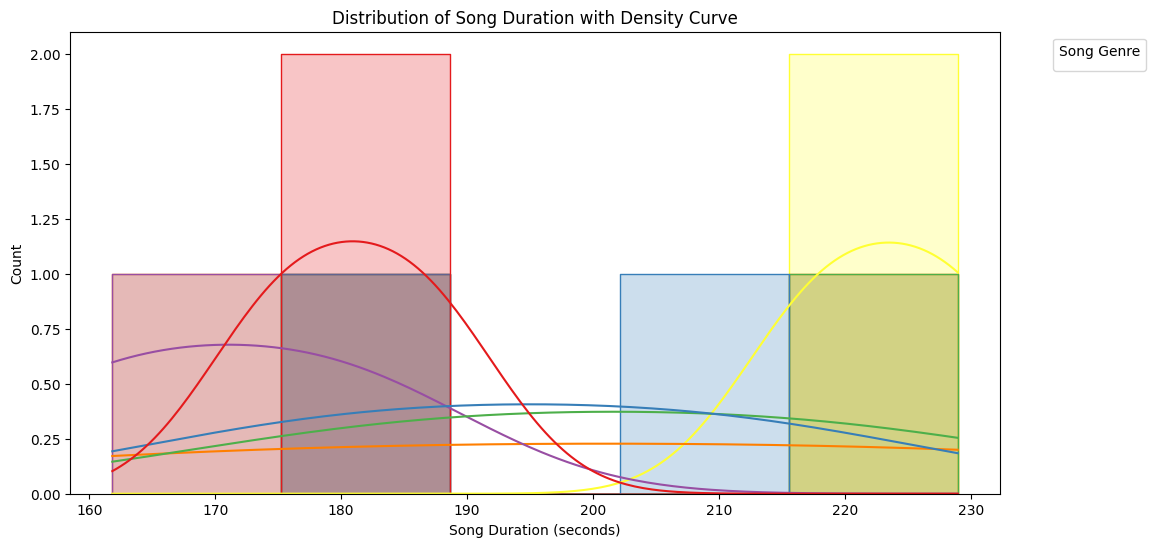

In [10]:
# Filtering out genres with fewer than 2 data points

filtered_tracks_df = tracks_df.groupby('song_genre').filter(lambda x: len(x) > 1)


# Creating a color palette with enough distinct colors

num_genres = filtered_tracks_df['song_genre'].nunique()
palette = sns.color_palette("Set1", num_genres)


# Creating the plot and Histogram with density plot

plt.figure(figsize=(12, 6))

sns.histplot(data=filtered_tracks_df, x='song_duration', hue='song_genre', kde=True, element='step', palette=palette)

plt.title('Distribution of Song Duration with Density Curve')
plt.xlabel('Song Duration (seconds)')
plt.ylabel('Count')
plt.legend(title='Song Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()